<a href="https://colab.research.google.com/github/VivianeSouza923/Wproject_Iot/blob/main/Treinamento_Bot_Iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pycaret
!pip install shap
!pip install NumPy


In [29]:
# importando o pandas, que a gente vai precisar.
import pandas as pd
# importando o pycaret. te conhecendo agora, amigo
from pycaret.utils import version


# qual a versão?
print('Pycaret:'+version())



Pycaret:3.0.3


In [30]:
# ler base de dados
data = pd.read_csv('dset.csv')
# mostra um gostinho da base de dados
data.head()

,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
0,tcp,192.168.100.147,49960,192.168.100.7,80.0,9.0,0.068909,75.0,0.000000,1.0,0.068909,96.0,14.511893,0.566862,0.137818,1.0
1,arp,192.168.100.7,-1,192.168.100.147,-1.0,10.0,0.000000,2.0,0.000131,2.0,0.000131,1.0,0.000000,0.000000,0.000131,1.0
2,tcp,192.168.100.147,49962,192.168.100.7,80.0,11.0,0.064494,75.0,0.000000,1.0,0.064494,96.0,15.505319,0.567549,0.128988,1.0
3,tcp,192.168.100.147,49964,192.168.100.7,80.0,12.0,0.064189,75.0,0.000000,1.0,0.064189,96.0,15.578993,0.567570,0.128378,1.0
4,tcp,192.168.100.147,49966,192.168.100.7,80.0,13.0,0.063887,75.0,0.000000,1.0,0.063887,96.0,15.652637,0.567630,0.127774,1.0


In [31]:

# pegar a informação da GPU
# esse comando que a gente tá usando é uma linha de comando fornecida pela NVIDIA para monitorar e gerenciar dispositivos NVIDIA GPU em um sistema. Ele fornece informações detalhadas sobre o status da GPU, uso da memória, processos em execução e várias métricas relacionadas à GPU.
gpu_info = !nvidia-smi
# juntar
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Tue Jun 27 22:41:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
# remover as linhas que tem valores ausentes em attack
#data.dropna(subset=['attack'], inplace=True)



In [33]:
# imports
from pycaret.classification import *
from pycaret.classification import compare_models

# MELHOR?
best = setup(data, target='attack', ignore_features=['attack'], use_gpu=True)

available_estimators = models()
print(available_estimators)


ValueError: ignored

In [27]:
# COMPARAR OS MODELOS
best = compare_models(include = ['knn','lr','svm','nb','dt'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000,6.0590
nb,Naive Bayes,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000,0.4820
dt,Decision Tree Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000,0.5900


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
print(best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
#plot_model(best, plot='auc')

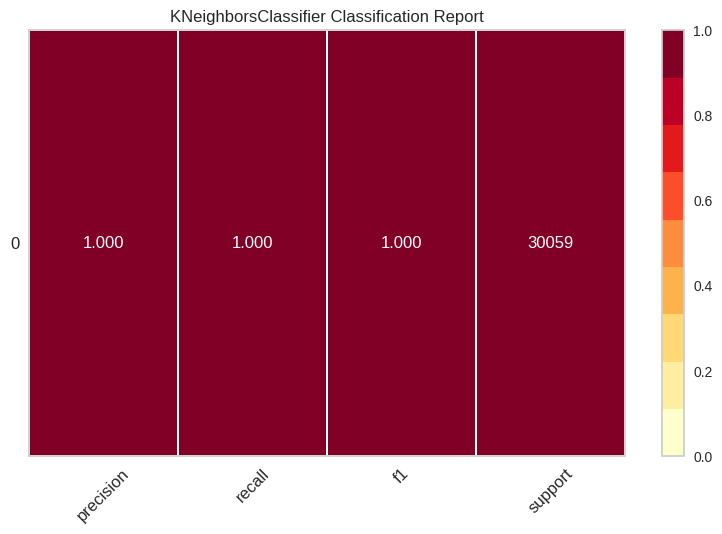

In [23]:
plot_model(best, plot = 'class_report')

In [24]:
plot_model(best, plot = 'feature')

TypeError: ignored